In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving stars_dataset (1).csv to stars_dataset (1).csv


In [ ]:
df=pd.read_csv("stars_dataset (1).csv")
df.head()

,No,Star Name,Equatorial Coordinates,Galactic Longitude,Galactic Latitude,Spectral Type,Visual Magnitude,Absolute Magnitude,Parallax,Error,Distance (ly)
0,1,Alpha Canis Majoris Sirius,06 45 -16.7,227.2,-8.9,A1V,-1.46,1.43,379.21,1.58,9
1,2,Alpha Carinae Canopus,06 24 -52.7,261.2,-25.3,F0Ib,-0.73,-5.64,10.43,0.53,310
2,3,Alpha Centauri Rigil Kentaurus,14 40 -60.8,315.8,-0.7,G2V+K1V,-0.29,4.06,742.12,1.40,4
3,7,Beta Orionis Rigel,05 15 -8.2,209.3,-25.1,B8Ia,0.15v,-6.72v,4.22,0.81,770
4,9,Alpha Eridani Achernar,01 38 -57.2,290.7,-58.8,B3V,0.45,-2.77,22.68,0.57,144


In [ ]:
#leading
def leading_digit(series):
    series = series.dropna()
    leading = series.astype(str).str.replace('-', '').str.lstrip('0').str.extract(r'([1-9])')[0]
    return leading.dropna().astype(int)
lead_digits_vm = leading_digit(df['Visual Magnitude'])
lead_digits_vm.head()

,0
0,1
1,7
2,2
3,1
4,4


In [ ]:
# Counting digit frequencies here
digit_counts_vm = lead_digits_vm.value_counts().sort_index()
total_vm = digit_counts_vm.sum()
digit_freqs_vm = digit_counts_vm / total_vm
print(digit_freqs_vm)


0
1    0.140000
2    0.406667
3    0.413333
4    0.006667
5    0.006667
7    0.020000
8    0.006667
Name: count, dtype: float64


In [ ]:
#benford frequencies
benford_freq = {d: np.log10(1 + 1/d) for d in range(1, 10)}
benford_df_vm = pd.DataFrame({
    'Digit': list(benford_freq.keys()),
    'Benford': list(benford_freq.values()),
    'Observed': [digit_freqs_vm.get(d, 0) for d in range(1, 10)]
})
benford_df_vm


,Digit,Benford,Observed
0,1,0.301030,0.140000
1,2,0.176091,0.406667
2,3,0.124939,0.413333
3,4,0.096910,0.006667
4,5,0.079181,0.006667
5,6,0.066947,0.000000
6,7,0.057992,0.020000
7,8,0.051153,0.006667
8,9,0.045757,0.000000


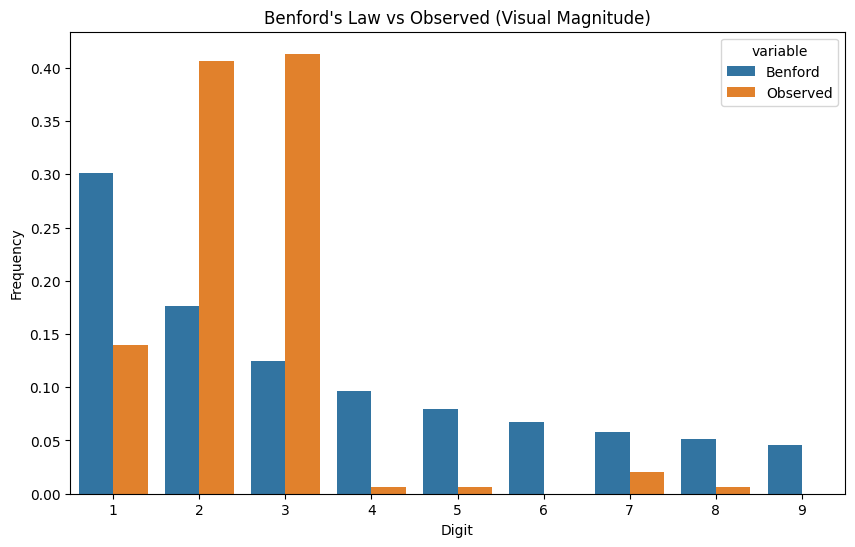

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Digit', y='value', hue='variable',
            data=pd.melt(benford_df_vm, id_vars='Digit', value_vars=['Benford', 'Observed']))
plt.title("Benford's Law vs Observed (Visual Magnitude)")
plt.ylabel("Frequency")
plt.show()


In [ ]:
lead_digits_am = leading_digit(df['Absolute Magnitude'])
lead_digits_am.head()


,0
0,1
1,5
2,4
3,6
4,2


In [ ]:
digit_counts_am = lead_digits_am.value_counts().sort_index()
total_am = digit_counts_am.sum()
digit_freqs_am = digit_counts_am / total_am
print(digit_freqs_am)


0
1    0.266667
2    0.160000
3    0.153333
4    0.133333
5    0.106667
6    0.080000
7    0.026667
8    0.040000
9    0.033333
Name: count, dtype: float64


In [ ]:
benford_df_am = pd.DataFrame({
    'Digit': list(benford_freq.keys()),
    'Benford': list(benford_freq.values()),
    'Observed': [digit_freqs_am.get(d, 0) for d in range(1, 10)]
})
benford_df_am


,Digit,Benford,Observed
0,1,0.301030,0.266667
1,2,0.176091,0.160000
2,3,0.124939,0.153333
3,4,0.096910,0.133333
4,5,0.079181,0.106667
5,6,0.066947,0.080000
6,7,0.057992,0.026667
7,8,0.051153,0.040000
8,9,0.045757,0.033333


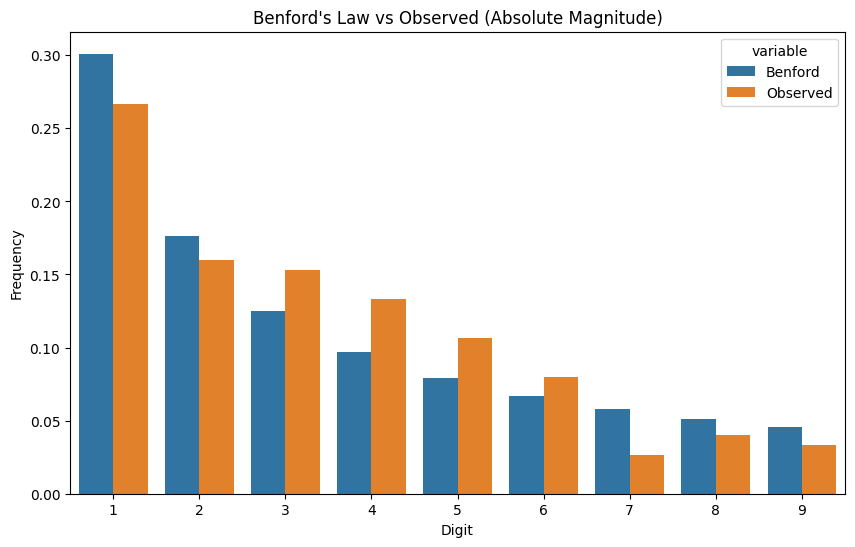

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Digit', y='value', hue='variable',
            data=pd.melt(benford_df_am, id_vars='Digit', value_vars=['Benford', 'Observed']))
plt.title("Benford's Law vs Observed (Absolute Magnitude)")
plt.ylabel("Frequency")
plt.show()



In [ ]:
#Parallax column
lead_digits_parallax = leading_digit(df['Parallax'])
lead_digits_parallax.head()


,0
0,3
1,1
2,7
3,4
4,2


In [ ]:
digit_counts_parallax = lead_digits_parallax.value_counts().sort_index()
total_parallax = digit_counts_parallax.sum()
digit_freqs_parallax = digit_counts_parallax / total_parallax
print(digit_freqs_parallax)


0
1    0.313333
2    0.193333
3    0.126667
4    0.100000
5    0.066667
6    0.060000
7    0.080000
8    0.033333
9    0.026667
Name: count, dtype: float64


In [ ]:
benford_df_parallax = pd.DataFrame({
    'Digit': list(benford_freq.keys()),
    'Benford': list(benford_freq.values()),
    'Observed': [digit_freqs_parallax.get(d, 0) for d in range(1, 10)]
})
benford_df_parallax


,Digit,Benford,Observed
0,1,0.301030,0.313333
1,2,0.176091,0.193333
2,3,0.124939,0.126667
3,4,0.096910,0.100000
4,5,0.079181,0.066667
5,6,0.066947,0.060000
6,7,0.057992,0.080000
7,8,0.051153,0.033333
8,9,0.045757,0.026667


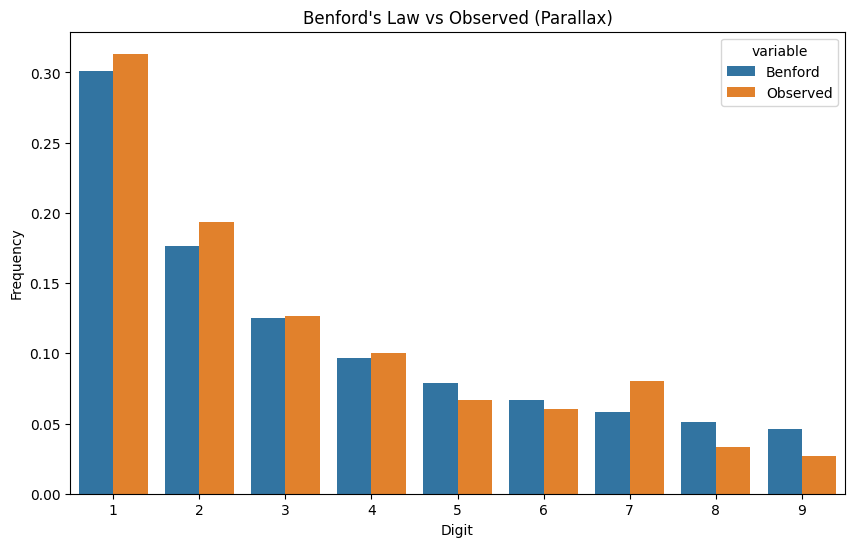

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Digit', y='value', hue='variable',
            data=pd.melt(benford_df_parallax, id_vars='Digit', value_vars=['Benford', 'Observed']))
plt.title("Benford's Law vs Observed (Parallax)")
plt.ylabel("Frequency")
plt.show()


In [ ]:
#Error column
lead_digits_error = leading_digit(df['Error'])
lead_digits_error.head()

,0
0,1
1,5
2,1
3,8
4,5


In [ ]:
digit_counts_error = lead_digits_error.value_counts().sort_index()
total_error = digit_counts_error.sum()
digit_freqs_error = digit_counts_error / total_error
print(digit_freqs_error)


0
1    0.046667
2    0.013333
3    0.006667
4    0.093333
5    0.193333
6    0.106667
7    0.226667
8    0.180000
9    0.133333
Name: count, dtype: float64


In [ ]:
benford_df_error = pd.DataFrame({
    'Digit': list(benford_freq.keys()),
    'Benford': list(benford_freq.values()),
    'Observed': [digit_freqs_error.get(d, 0) for d in range(1, 10)]
})
benford_df_error


,Digit,Benford,Observed
0,1,0.301030,0.046667
1,2,0.176091,0.013333
2,3,0.124939,0.006667
3,4,0.096910,0.093333
4,5,0.079181,0.193333
5,6,0.066947,0.106667
6,7,0.057992,0.226667
7,8,0.051153,0.180000
8,9,0.045757,0.133333


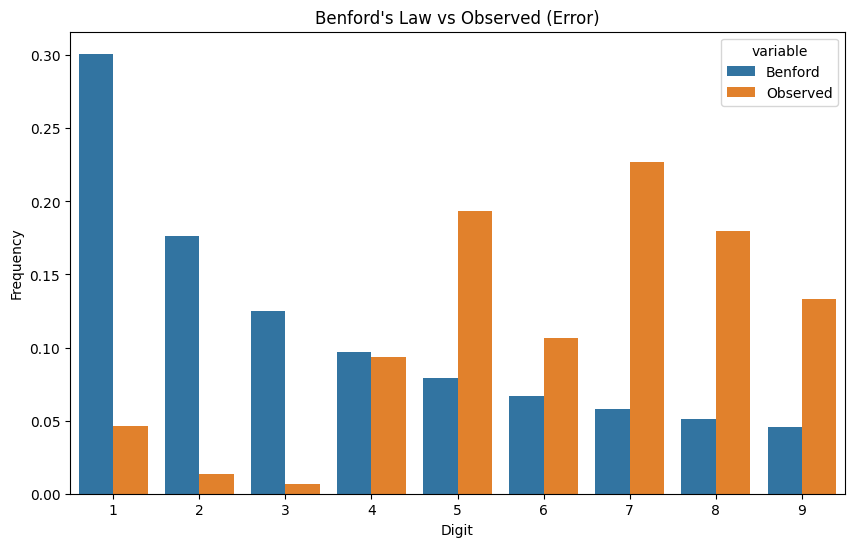

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Digit', y='value', hue='variable',
            data=pd.melt(benford_df_error, id_vars='Digit', value_vars=['Benford', 'Observed']))
plt.title("Benford's Law vs Observed (Error)")
plt.ylabel("Frequency")
plt.show()


In [ ]:
#For Distance Column
lead_digits_distance = leading_digit(df['Distance (ly)'])
lead_digits_distance.head()

,0
0,9
1,3
2,4
3,7
4,1


In [ ]:
digit_counts_distance = lead_digits_distance.value_counts().sort_index()
total_distance = digit_counts_distance.sum()
digit_freqs_distance = digit_counts_distance / total_distance
print(digit_freqs_distance)


0
1    0.306667
2    0.186667
3    0.093333
4    0.086667
5    0.080000
6    0.066667
7    0.073333
8    0.046667
9    0.060000
Name: count, dtype: float64


In [ ]:
benford_df_distance = pd.DataFrame({
    'Digit': list(benford_freq.keys()),
    'Benford': list(benford_freq.values()),
    'Observed': [digit_freqs_distance.get(d, 0) for d in range(1, 10)]
})
benford_df_distance


,Digit,Benford,Observed
0,1,0.301030,0.306667
1,2,0.176091,0.186667
2,3,0.124939,0.093333
3,4,0.096910,0.086667
4,5,0.079181,0.080000
5,6,0.066947,0.066667
6,7,0.057992,0.073333
7,8,0.051153,0.046667
8,9,0.045757,0.060000


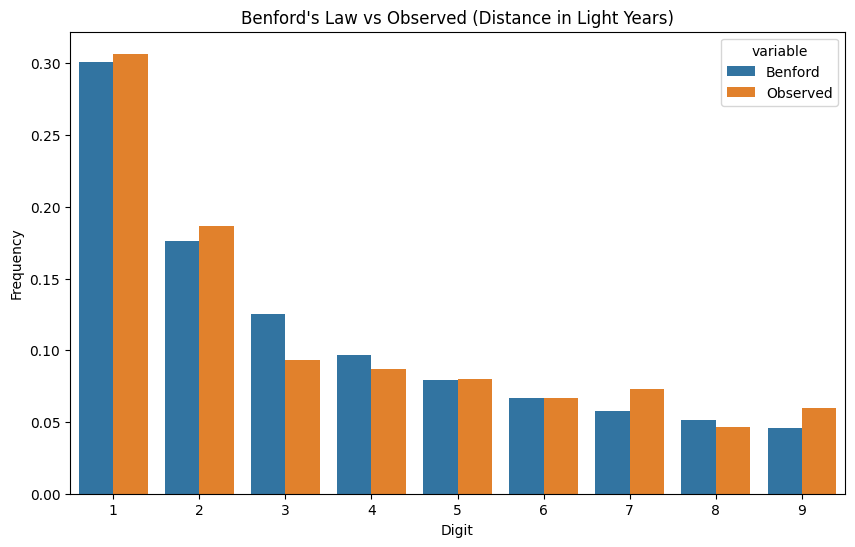

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Digit', y='value', hue='variable',
            data=pd.melt(benford_df_distance, id_vars='Digit', value_vars=['Benford', 'Observed']))
plt.title("Benford's Law vs Observed (Distance in Light Years)")
plt.ylabel("Frequency")
plt.show()


In [ ]:
#equitorial coordinates
def extract_numbers_from_coord(coord_str):
    import re
    matches = re.findall(r'-?\d+\.?\d*', str(coord_str))
    return [float(m) for m in matches] if matches else []
coord_numbers = df['Equatorial Coordinates'].dropna().apply(extract_numbers_from_coord).explode().dropna().astype(float)



In [ ]:
lead_digits_coord = leading_digit(coord_numbers)


In [ ]:
digit_counts_coord = lead_digits_coord.value_counts().sort_index()
total_coord = digit_counts_coord.sum()
digit_freqs_coord = digit_counts_coord / total_coord


In [ ]:
benford_df_coord = pd.DataFrame({
    'Digit': list(benford_freq.keys()),
    'Benford': list(benford_freq.values()),
    'Observed': [digit_freqs_coord.get(d, 0) for d in range(1, 10)]
})
benford_df_coord

,Digit,Benford,Observed
0,1,0.301030,0.206818
1,2,0.176091,0.186364
2,3,0.124939,0.131818
3,4,0.096910,0.145455
4,5,0.079181,0.163636
5,6,0.066947,0.081818
6,7,0.057992,0.031818
7,8,0.051153,0.025000
8,9,0.045757,0.027273


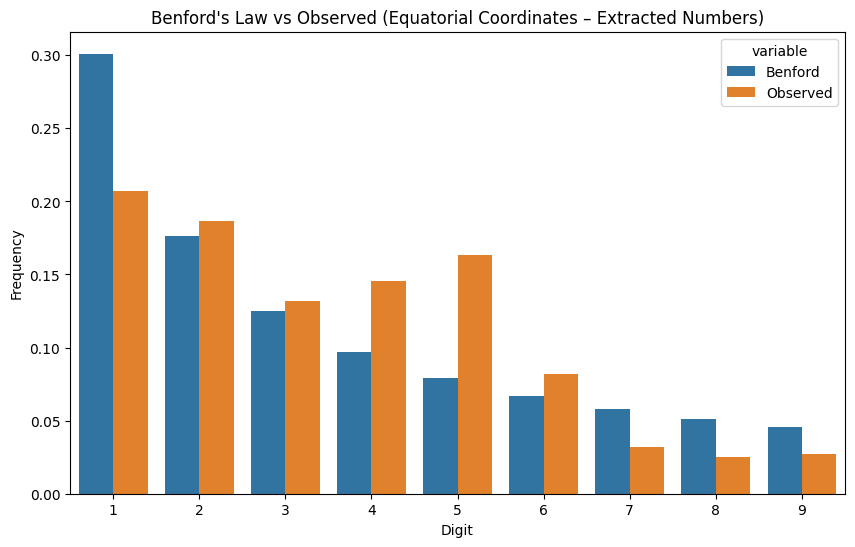

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Digit', y='value', hue='variable',
            data=pd.melt(benford_df_coord, id_vars='Digit', value_vars=['Benford', 'Observed']))
plt.title("Benford's Law vs Observed (Equatorial Coordinates – Extracted Numbers)")
plt.ylabel("Frequency")
plt.show()


In [ ]:
#all datasets--> single dataframe
benford_df_vm['Column'] = 'Visual Magnitude'
benford_df_am['Column'] = 'Absolute Magnitude'
benford_df_parallax['Column'] = 'Parallax'
benford_df_error['Column'] = 'Error'
benford_df_distance['Column'] = 'Distance (ly)'
benford_df_coord['Column'] = 'Equatorial Coordinates'
combined_df = pd.concat([
    benford_df_vm,
    benford_df_am,
    benford_df_parallax,
    benford_df_error,
    benford_df_distance,
    benford_df_coord
], ignore_index=True)
combined_df = combined_df[['Column', 'Digit', 'Benford', 'Observed']]
combined_df.head()


,Column,Digit,Benford,Observed
0,Visual Magnitude,1,0.301030,0.140000
1,Visual Magnitude,2,0.176091,0.406667
2,Visual Magnitude,3,0.124939,0.413333
3,Visual Magnitude,4,0.096910,0.006667
4,Visual Magnitude,5,0.079181,0.006667


In [ ]:
from scipy.stats import chisquare

chi_results = []

for col in combined_df['Column'].unique():
    temp = combined_df[combined_df['Column'] == col]
    total_obs = 1000
    obs_counts = (temp.set_index('Digit')['Observed'] * total_obs).round().astype(int).to_dict()
    observed = np.array([obs_counts.get(d, 0) for d in range(1, 10)])
    expected = np.array([benford_freq[d] * sum(observed) for d in range(1, 10)])
    chi_stat, p_val = chisquare(f_obs=observed, f_exp=expected, axis=None)

    chi_results.append({
        'Column': col,
        'Chi-Square Statistic': round(chi_stat, 3),
        'p-value': round(p_val, 4),
        'Benford Conformity': 'Likely' if p_val > 0.05 else 'Unlikely'
    })

chi_df = pd.DataFrame(chi_results)
chi_df


,Column,Chi-Square Statistic,p-value,Benford Conformity
0,Visual Magnitude,1376.633,0.0000,Unlikely
1,Absolute Magnitude,59.930,0.0000,Unlikely
2,Parallax,27.310,0.0006,Unlikely
3,Error,1647.917,0.0000,Unlikely
4,Distance (ly),18.615,0.0171,Unlikely
5,Equatorial Coordinates,181.144,0.0000,Unlikely


In [ ]:
final_report = combined_df.merge(chi_df, on='Column')
final_report.head()


,Column,Digit,Benford,Observed,Chi-Square Statistic,p-value,Benford Conformity
0,Visual Magnitude,1,0.301030,0.140000,1376.633,0.0,Unlikely
1,Visual Magnitude,2,0.176091,0.406667,1376.633,0.0,Unlikely
2,Visual Magnitude,3,0.124939,0.413333,1376.633,0.0,Unlikely
3,Visual Magnitude,4,0.096910,0.006667,1376.633,0.0,Unlikely
4,Visual Magnitude,5,0.079181,0.006667,1376.633,0.0,Unlikely


<ipython-input-51-ae5b572cbe38>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=chi_df, x='Column', y='Chi-Square Statistic', palette='viridis')


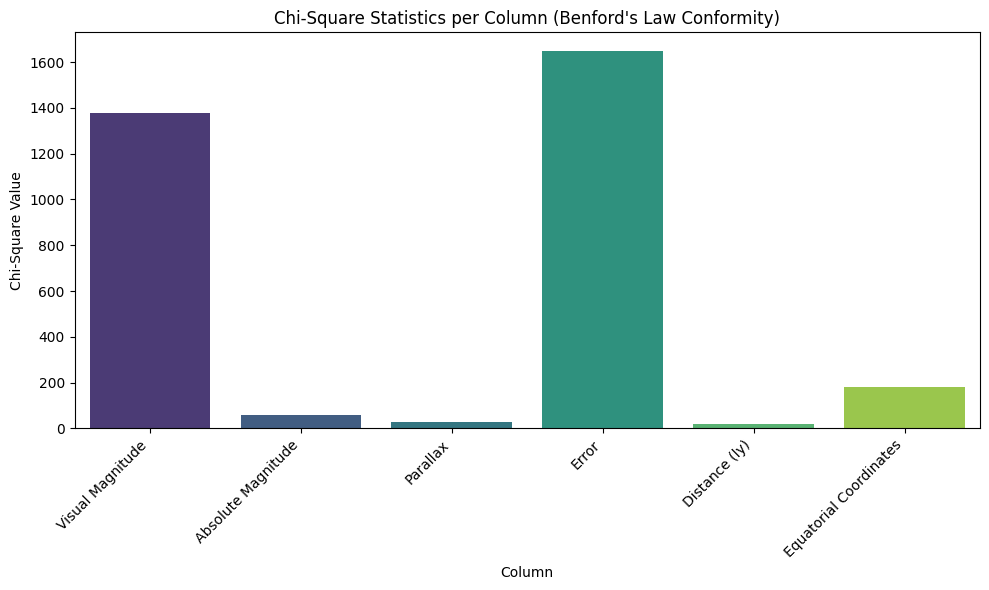

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
#chi-Square statistics for each column
plt.figure(figsize=(10, 6))
sns.barplot(data=chi_df, x='Column', y='Chi-Square Statistic', palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title("Chi-Square Statistics per Column (Benford's Law Conformity)")
plt.ylabel("Chi-Square Value")
plt.tight_layout()
plt.show()


In [ ]:
#insights
insights = []

for _, row in chi_df.iterrows():
    insights.append(f"{row['Column']}: {'Follows' if row['Benford Conformity'] == 'Likely' else 'Deviates from'} Benford's Law (p={row['p-value']})")
insights_df = pd.DataFrame(insights, columns=["Insights"])
final_report_with_insights = pd.concat([final_report, insights_df], axis=1)
final_report_with_insights.head()


,Column,Digit,Benford,Observed,Chi-Square Statistic,p-value,Benford Conformity,Insights
0,Visual Magnitude,1,0.301030,0.140000,1376.633,0.0,Unlikely,Visual Magnitude: Deviates from Benford's Law ...
1,Visual Magnitude,2,0.176091,0.406667,1376.633,0.0,Unlikely,Absolute Magnitude: Deviates from Benford's La...
2,Visual Magnitude,3,0.124939,0.413333,1376.633,0.0,Unlikely,Parallax: Deviates from Benford's Law (p=0.0006)
3,Visual Magnitude,4,0.096910,0.006667,1376.633,0.0,Unlikely,Error: Deviates from Benford's Law (p=0.0)
4,Visual Magnitude,5,0.079181,0.006667,1376.633,0.0,Unlikely,Distance (ly): Deviates from Benford's Law (p=...


**Thank you**